In [3]:
!expect /workspaces/data-loaders/scripts/nbia_download.tcl DOWNLOAD -1 /workspaces/data-loaders/nbia_manifest_files/nsclc_radiomics_small/manifest-1729875866855.tcia /workspaces/data-loaders/downloads/nbia/

spawn /opt/nbia-data-retriever/nbia-data-retriever --cli /workspaces/data-loaders/nbia_manifest_files/nsclc_radiomics_small/manifest-1729875866855.tcia -d /workspaces/data-loaders/downloads/nbia/ -v -F
The download log can be found at /workspaces/data-loaders/downloads/nbia/NBIADataRetrieverCLI-20242225052218.log
2024-10-25 17:22:18: INFO: Using manifiest file: /workspaces/data-loaders/nbia_manifest_files/nsclc_radiomics_small/manifest-1729875866855.tcia

2024-10-25 17:22:18: INFO: Running with option: quiet = false; verbose = true; force = true

2024-10-25 17:22:18: INFO: The type of data downloading is DICOM

Data Usage Policy

Any user accessing TCIA data must agree to:
- Not use the requested datasets, either alone or in concert with any other information, to identify or contact individual participants from whom data and/or samples were collected and follow all other conditions specified in the TCIA Site Disclaimer. Approved Users also agree not to generate and use information (e.g

In [4]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pydicom as dicom

Matplotlib is building the font cache; this may take a moment.


In [6]:
example_ct_scan_path = '/workspaces/data-loaders/downloads/nbia/manifest-1729875866855/"NSCLC-Radiomics"/"LUNG1-001"/"09-18-2008"-"StudyID"-""-9331"/"0.000000"-""-2046"/1-001.dcm'
segmentation_result_path = '/workspaces/data-loaders/downloads/nbia/manifest-1729875866855/"NSCLC-Radiomics"/"LUNG1-001"/"09-18-2008"-"StudyID"-""-9331"/"300.000000"-"Segmentation"-.554"/1-1.dcm'

ds_segmentation = dicom.dcmread(segmentation_result_path)
ds_ct = dicom.dcmread(example_ct_scan_path)

pixel_array_segmentation_result_numpy = ds_segmentation.pixel_array
pixel_array_example_ct_scan_numpy = ds_ct.pixel_array

print(pixel_array_segmentation_result_numpy.shape)
print(pixel_array_example_ct_scan_numpy.shape)

(536, 512, 512)
(512, 512)


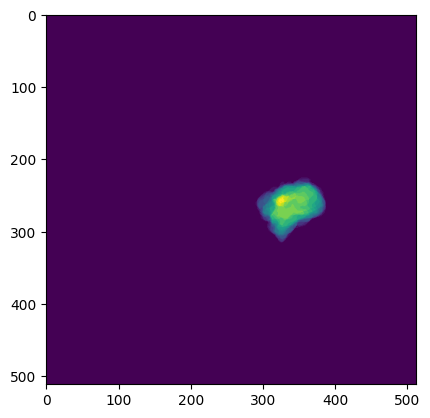

In [10]:
sum_image = np.sum(pixel_array_segmentation_result_numpy[0:134,:,:], axis=0)
plt.imshow(sum_image)
plt.show()

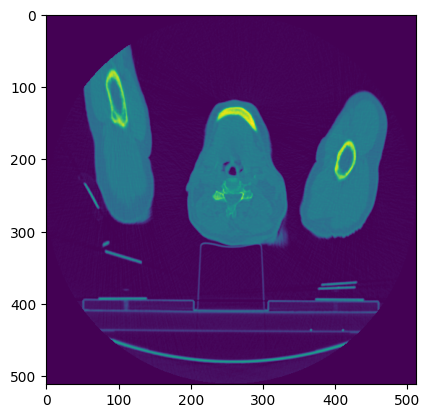

In [8]:
plt.imshow(pixel_array_example_ct_scan_numpy)
plt.show()